In [1]:
import pandas as pd
import seaborn as sns

In [137]:
df = pd.read_csv('checked.csv')

In [138]:
print(f'Length {len(df)}')
print(f'Good {len(df.loc[df.error_flag==0])}')
print(f'Bad {len(df.loc[df.error_flag==1])}')
print(f'TODO {len(df.loc[df.error_flag==-1])}')

Length 1325
Good 1035
Bad 202
TODO 88


In [139]:
ddir = '~/mnt/rds/pbjam/PBjamResults/'

In [142]:
cols = ['dnu', 'numax', 'eps', 'd02', 'alpha', 'env_height', 'env_width', 'mode_width', 'teff', 'bp_rp']
good = pd.DataFrame(columns=cols)
ids = [n.ID for idx, n in df.iterrows() if n.error_flag == 0]

for id in ids:
    try:
        tmp = pd.read_csv(ddir + str(int(id)) + '_summary.csv').loc[2][cols].values
        good = good.append(pd.DataFrame(data=[tmp], columns=cols))
    except:
        print(f'failed on {id}')
        
bad = pd.DataFrame(columns=cols)
ids = [n.ID for idx, n in df.iterrows() if n.error_flag == 1]
for id in ids:
    try:
        tmp = pd.read_csv(ddir + str(int(id)) + '_summary.csv').loc[2][cols].values
        bad = bad.append(pd.DataFrame(data=[tmp], columns=cols))
    except:
        print(f'failed on {id}')

failed on 6766513.0
failed on 6802438.0
failed on 6863041.0
failed on 6933899.0
failed on 6933899.0
failed on 7103006.0
failed on 7103006.0
failed on 7106245.0
failed on 7106245.0
failed on 7107778.0
failed on 7174707.0
failed on 7206837.0
failed on 7206837.0
failed on 7216846.0
failed on 7282890.0
failed on 7296438.0
failed on 7529180.0
failed on 7584900.0
failed on 7668623.0
failed on 7680114.0
failed on 7680114.0
failed on 7771282.0
failed on 7771282.0
failed on 7799349.0
failed on 7800289.0
failed on 7871531.0
failed on 7871531.0
failed on 7976303.0
failed on 8018599.0
failed on 8026226.0
failed on 8150065.0
failed on 8150065.0
failed on 8179536.0
failed on 8179536.0
failed on 8228742.0
failed on 8228742.0
failed on 8360349.0


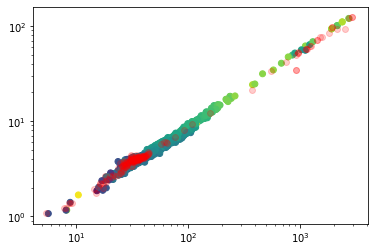

In [143]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.scatter(good.numax, good.dnu, c=good.eps)
ax.scatter(bad.numax, bad.dnu, c='r', alpha=0.2)
ax.set_xscale('log')
ax.set_yscale('log')

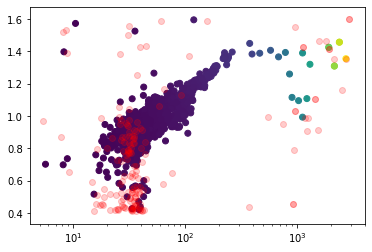

In [147]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(good.numax, good.eps, c=good.dnu)
ax.scatter(bad.numax, bad.eps, c='r', alpha=0.2)
ax.set_xscale('log')
#ax.set_yscale('log')

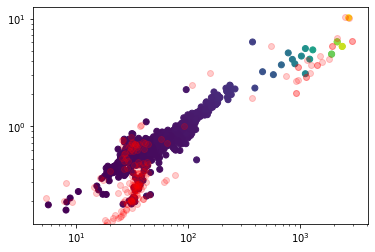

In [145]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(good.numax, good.d02,c=good.dnu)
ax.scatter(bad.numax, bad.d02, c='r', alpha=0.2)
ax.set_xscale('log')
ax.set_yscale('log')

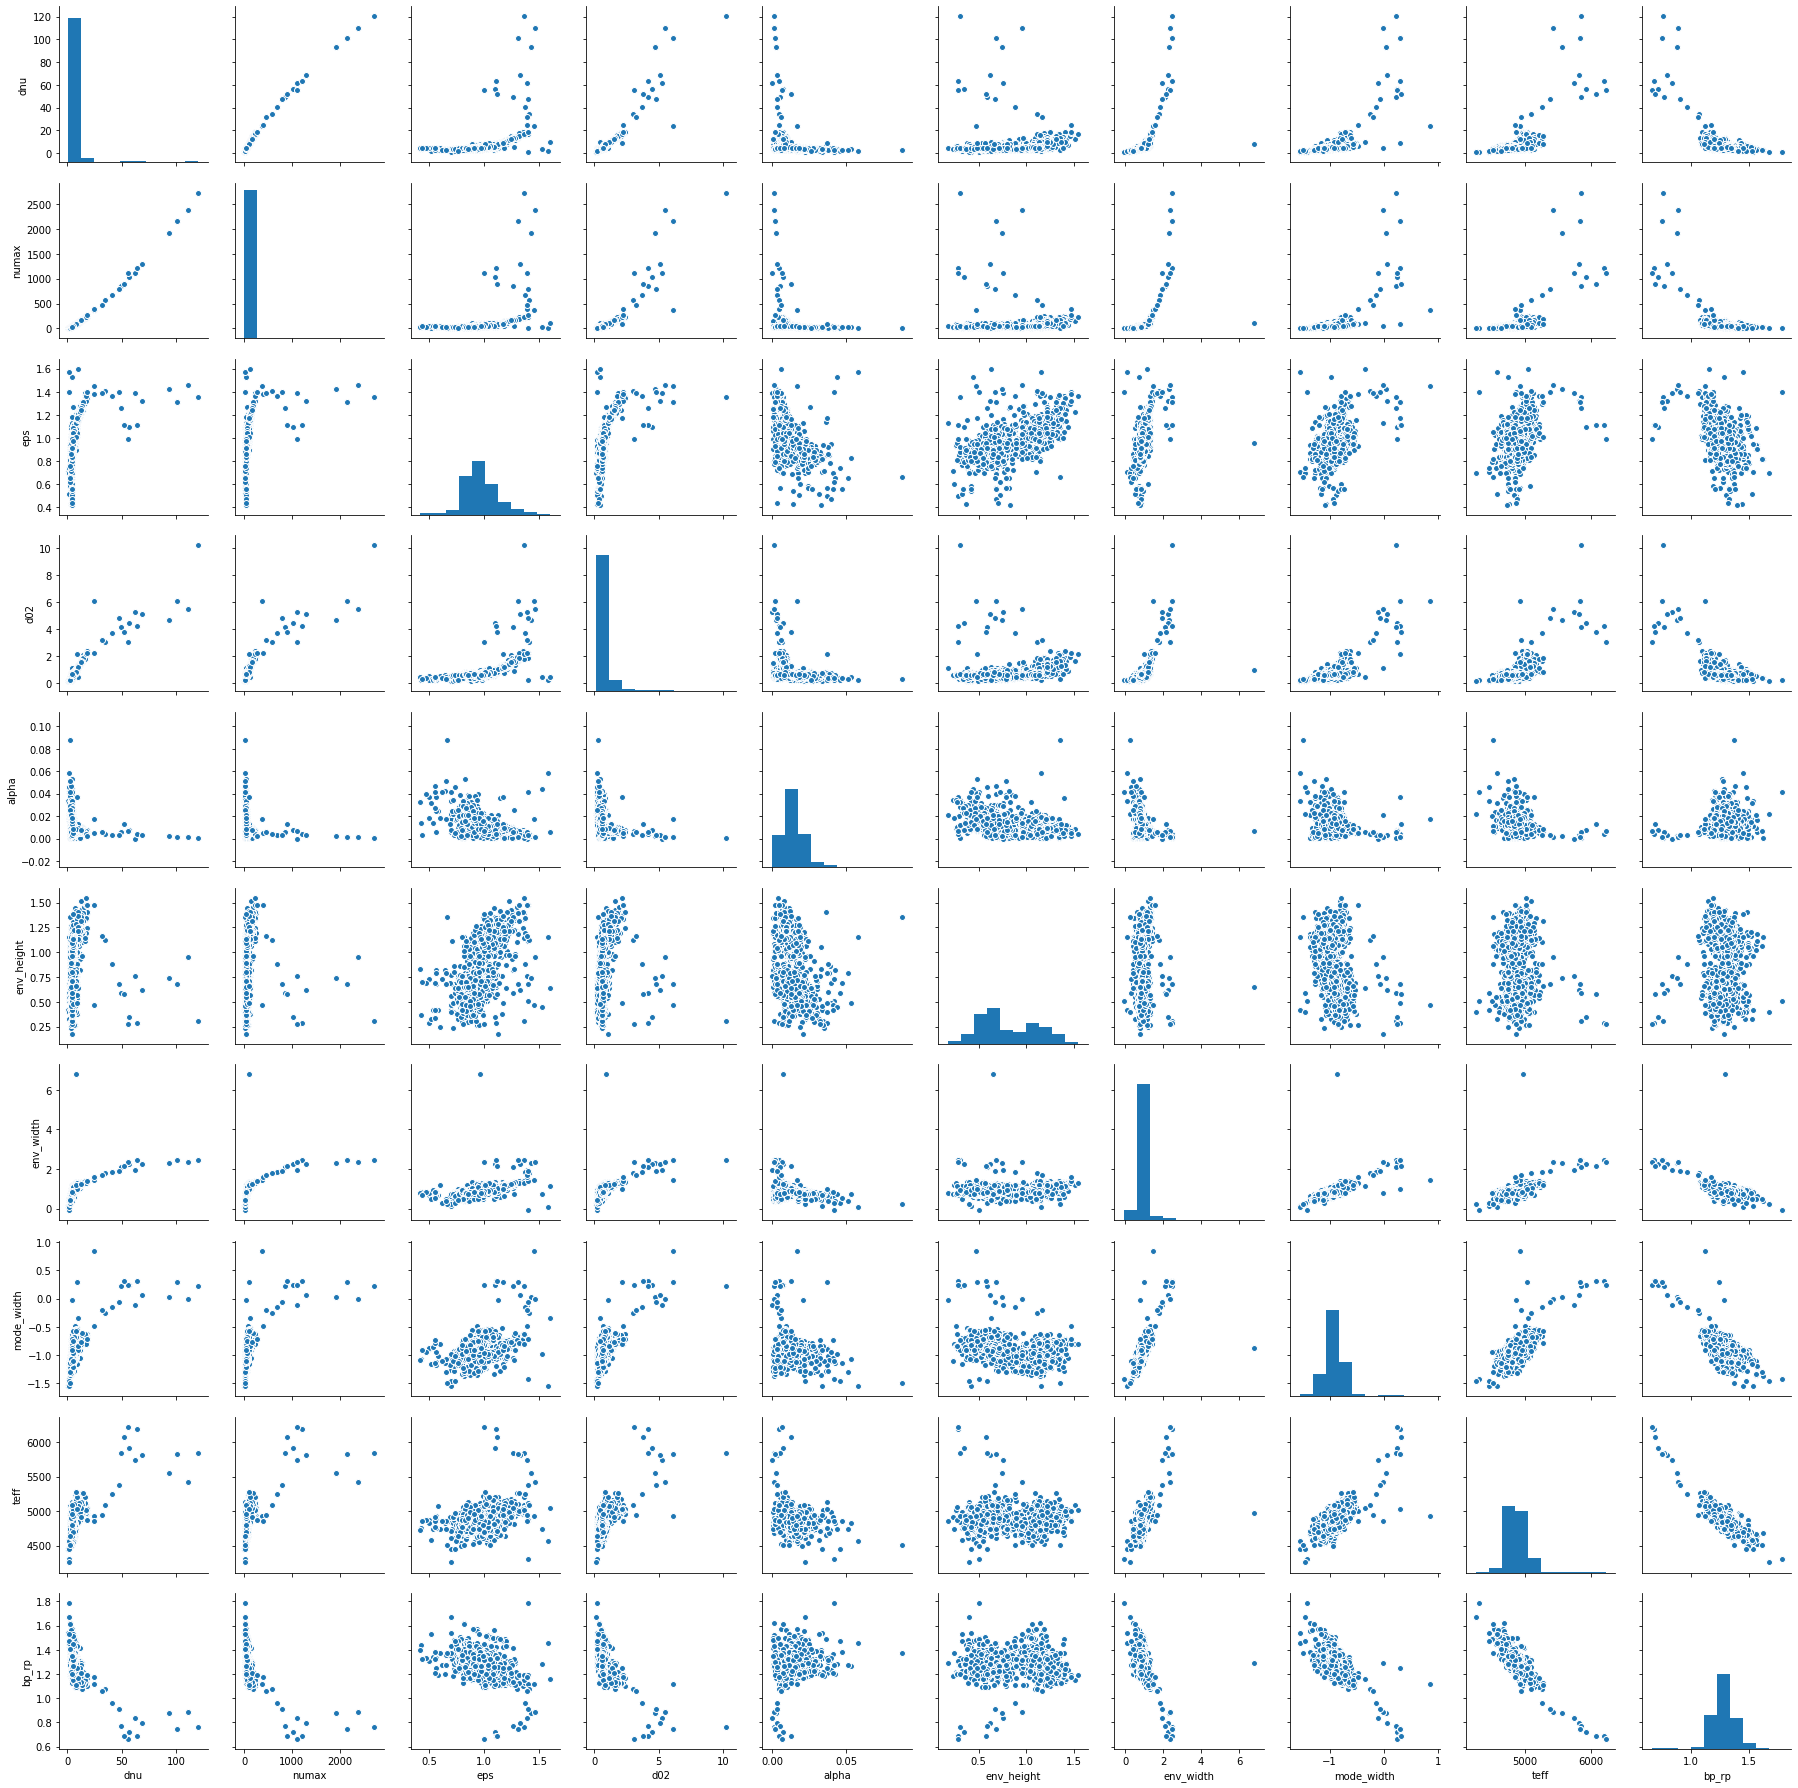

In [146]:
sns.pairplot(good)